# Chapter 3

## 3.1 Anatomy of a neural network

1. Layers
2. Input data
3. Loss Function
4. Optimizer

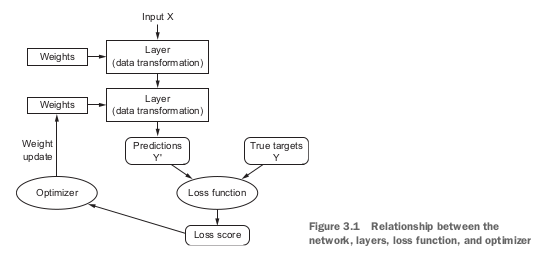

(Image source: Deep Learning with Python)

In [2]:
from keras import layers
layer = layers.Dense(32, input_shape = (784, )) #  a dense layer with 32 output units

# the above layer will only accept 2D tensor where the first dimension is 784 (axis 0, the batch dimension, is unspecified, and thus any value would be accepted)


During creating layers in Keras, you don't need to worry about the compatibility. For example:

In [3]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(32, input_shape = (784,)))
model.add(layers.Dense(32))


The second layer didn't receive an input shape argument- instead, it automatically inferred its input shape as being the output shape of the layer that came before.

## Loss functions and optimizers: keys to configuring the learning process

Even after the network architecture is defined, you still have to choose two more things:
1. Loss function(objective function): Quantity that will be minimized during training. It represents a measure of success for the task at hand.

2. Optimizer: Determines how the network will be updated based on a single scaler loss value


* A neural network that has multiple outputs may have multiple loss functions (one per output). But the gradient-descent process must be based on a single scaller loss valur; so, for multiloss networks, all losses are combined (via averaging) into a single scaler quantity. Choosing the right objective function for the right problem is extremely important: your network will take any shortcut it can, to minimize the loss; so if the objective doesn't fully correlate with success forthe task at hand, your network will end up doing things you may not have wanted. 

## Introduction to Keras

Key features of Keras:

* It allows the same code to run seamlessly on CPU or GPU

* It has a user-friendly API that makes it easy to quickly prototype deep-learning models

* It has built-in support for convolutional networks (for computer vision), recurent networks (for sequence processing), and combination of both.

* It support arbitrary network architectures.


### Developing with Keras: a quick overview

The typical Keras workflow looks like:

1. Define your training data: input tensors and target tensors.

2. Define a network of layers (or model) that maps your inputs to your targets.

3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.

4. Iterate on your training data by calling the fit() method of your model.

There are two ways to define a model: 

a. using the Sequential class (only for linear stacks of layers, which is the most common network archtitecture by far) 

b. functional API (for directed acyclic graphs of layers, which lets you build completely arbitarary architectures).

In [4]:
from keras import models
from keras import layers

model = models.Sequential() # for linear stacks of layers
model.add(layers.Dense(32, activation = 'relu', input_shape=(784, )))
model.add(layers.Dense(10, activation = 'softmax')) # output layer; softmax gives probability


In [6]:
# using functional API
input_tensor = layers.Input(shape = (784, ))
x = layers.Dense(32, activation = 'relu')(input_tensor)
output_tensor = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(inputs = input_tensor, outputs = output_tensor)

In [8]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss = 'mse', metrics = ['accuracy'])

In [ ]:
model.fit(input_tensor, target_tensor, batch_size = 128, epochs= 10)

## Setting up a deep-learning workstation

You will need GPU! Opps! That is hard part for me and I have to compromise it!

### Classifying movie reviews: a binary classification example

#### The IMDB dataset



In [13]:
# loading the IMDB dataset; a set of 50, 000 highly popularized review from the Internet Movie Database
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) # num_words = 10000 means that you will only keep the top 10000 most frequently occuring words in the training data


In [14]:
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [15]:
train_labels[1]

0

Here 0 means negative and 1 means positive in the dataset


In [16]:
max([max(sequence) for sequence in train_data])

9999

Because we are restricting to the top 10, 000 most frequent words, no word index will exceed 10, 000.

In [19]:
#word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) 
                           for (key, value) in word_index.items()])

#reverse it, mapping integer indices to words.
#decode the review. Note that the indices are offsets by 3 beacuse 0, 1, and 2 reversed indices for "pading", "start of sequence", and "unknown."

decoded_review = ' '.join([reverse_word_index.get(i-3, '?')
                          for i in train_data[1]])

### Preparing the data
 You can't feed integers into a neural network. You have to turn your lists into tensors. Two ways for it:
 
 1. Pad your lists so that they all have the same length, turn them into an integer tensor of shape(samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the embedding layer)
 
 2. One-hot encode your lists to turn them into vectors of 0s and 1s. 
 
 
 Details of one-hot encoder:

In [21]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    #creating an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1. # sets specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data) #vectorized training data

x_test = vectorize_sequences(test_data) #vectorized test data

    

In [22]:
x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])